In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [84]:
times = np.linspace(-0.1, 0.1, 300)

In [85]:
24 * 60 * (times[1] - times[0])

0.9632107023411285

In [86]:
from fleck import Star, generate_spots
from batman import TransitParams, TransitModel
import astropy.units as u

planet = TransitParams()
planet.per = 5 #88
planet.a = 15 #float(0.387*u.AU / u.R_sun)
planet.rp = 0.1
planet.w = 90
planet.ecc = 0
planet.inc = 90
planet.t0 = 0
planet.limb_dark = 'quadratic'
planet.u = [0.5079, 0.2239]

transit_model = TransitModel(planet, times).light_curve(planet)

In [87]:
star = Star(spot_contrast=0.7, u_ld=planet.u, rotation_period=26)

In [88]:
koi_stdevs = np.load('../data/oot_scatter.npy')

True


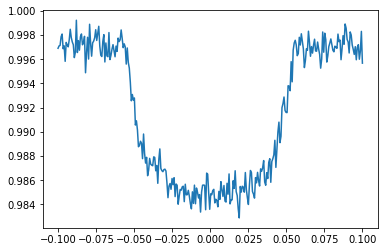

In [91]:
n_transits = 10000
transits = []
residuals = []
spots_occulted = []
for i in range(n_transits): 
    b = np.random.rand()
    planet.inc = np.degrees(np.arccos(b/planet.a))
    
    spot_lons, spot_lats, spot_radii, inc_stellar = generate_spots(-90, 0, 0.04, 28, inclinations=90*u.deg)
    lc, so = star.light_curve(spot_lons, spot_lats, spot_radii,
                              inc_stellar, planet=planet, times=times, 
                              return_spots_occulted=True, fast=True)
    
    lc += koi_stdevs[np.random.randint(0, len(koi_stdevs))] * np.random.randn(len(lc))[:, np.newaxis]
    
    transits.append(lc)

    lc = lc[:, 0] - transit_model + 1e-4 * np.random.randn(len(times))
    
    fit = np.polyval(np.polyfit(times - times.mean(), lc, 3), times - times.mean())
    residual = (lc - fit) / planet.rp**2
#     transits.append(residuals)
    spots_occulted.append(so)
    residuals.append(residual)
print(spots_occulted[-1])
plt.plot(times, transits[-1])

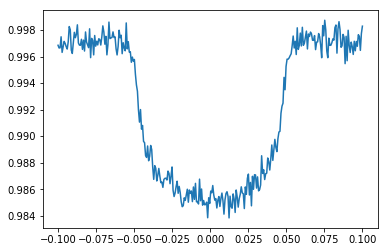

In [92]:
plt.plot(times, transits[np.random.randint(0, len(transits))])

In [93]:
np.save('data/simulated_transit_lcs.npy', np.hstack(transits).T)
np.save('data/simulated_spots_occulted.npy', spots_occulted)

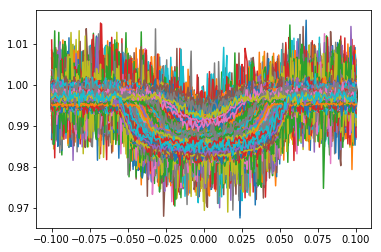

In [94]:
for transit in transits: 
    plt.plot(times, transit)

In [95]:
import os
os.system('say "done"')

0